## Algerian Forest Fires Dataset - Data Analysis and Linear Regression Model Building
## Problem statement

Here is algerian dataset which has attributes Attribute Information:

Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations

Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42

RH : Relative Humidity in %: 21 to 90

Ws :Wind speed in km/h: 6 to 29

Rain: total day in mm: 0 to 16.8

## FWI Components

Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5

Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9

Drought Code (DC) index from the FWI system: 7 to 220.4

Initial Spread Index (ISI) index from the FWI system: 0 to 18.5

Buildup Index (BUI) index from the FWI system: 1.1 to 68

Fire Weather Index (FWI) Index: 0 to 31.1

Classes: two classes, namely Fire and not Fire

We need to find the temprature as based on the other conditions.

## We have to perform :-
Data Collection
Exploratory Data Analysis
Data Cleaning
Model Building
Model Predictions

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings; warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [3]:
dataset.iloc[122]

day            Sidi-Bel Abbes Region Dataset
month                                    NaN
year                                     NaN
Temperature                              NaN
 RH                                      NaN
 Ws                                      NaN
Rain                                     NaN
FFMC                                     NaN
DMC                                      NaN
DC                                       NaN
ISI                                      NaN
BUI                                      NaN
FWI                                      NaN
Classes                                  NaN
Name: 122, dtype: object

In [4]:
dataset.iloc[123]

day                    day
month                month
year                  year
Temperature    Temperature
 RH                     RH
 Ws                     Ws
Rain                 Rain 
FFMC                  FFMC
DMC                    DMC
DC                      DC
ISI                    ISI
BUI                    BUI
FWI                    FWI
Classes          Classes  
Name: 123, dtype: object

In [5]:
dataset.shape

(246, 14)

In [6]:
# drop rows
dataset.drop([122,123],inplace=True)
dataset.reset_index(drop=True,inplace=True)

In [7]:
dataset.shape

(244, 14)

In [8]:
dataset.loc[:122,'region'] = 'bejaia'
dataset.loc[122:,'region'] = 'Sidi-Bel Abbes'

In [9]:
# Stripping the column names
dataset.columns = [col.strip() for col in dataset.columns]
dataset.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [10]:
dataset['Classes'] = dataset['Classes'].str.strip()
dataset['Classes'].unique()

array(['not fire', 'fire', nan], dtype=object)

In [11]:
dataset['Classes'].unique()

array(['not fire', 'fire', nan], dtype=object)

## Understanding the dataset

In [12]:
#displaying first 5 rows of dataset
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,bejaia
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,bejaia
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,bejaia
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,bejaia
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,bejaia


In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4   RH           244 non-null    object
 5   Ws           244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
 14  region       244 non-null    object
dtypes: object(15)
memory usage: 28.7+ KB


In [14]:
# checking str data in day
dataset[~dataset.day.str.isnumeric()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region


In [15]:
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,bejaia
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,bejaia
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,bejaia
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,bejaia
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,bejaia


In [16]:
dataset.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [17]:
dataset[~dataset['ISI'].str.isnumeric()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,bejaia
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,bejaia
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,bejaia
5,06,06,2012,31,67,14,0,82.6,5.8,22.2,3.1,7,2.5,fire,bejaia
6,07,06,2012,33,54,13,0,88.2,9.9,30.5,6.4,10.9,7.2,fire,bejaia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,Sidi-Bel Abbes
240,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,Sidi-Bel Abbes
241,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,Sidi-Bel Abbes
242,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,Sidi-Bel Abbes


In [18]:
dataset[dataset['DC'].apply(lambda x: pd.to_numeric(x,errors='coerce')).isna()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
165,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,Sidi-Bel Abbes


In [19]:
# checking rows where str present in numerical columns
for col in dataset.columns:
    if col not in ['Classes','region']:
        
        # Used to identify non-numeric values
        mask = dataset[col].apply(lambda x: pd.to_numeric(x, errors='coerce')).isna()
        if mask.any():
            print(f'Column: {col}')
            print(dataset[mask])
            print('-----------------------------------------------------------------')

Column: DC
    day month  year Temperature  RH  Ws Rain  FFMC   DMC      DC   ISI   BUI  \
165  14    07  2012          37  37  18  0.2  88.9  12.9  14.6 9  12.5  10.4   

         FWI Classes          region  
165  fire        NaN  Sidi-Bel Abbes  
-----------------------------------------------------------------
Column: FWI
    day month  year Temperature  RH  Ws Rain  FFMC   DMC      DC   ISI   BUI  \
165  14    07  2012          37  37  18  0.2  88.9  12.9  14.6 9  12.5  10.4   

         FWI Classes          region  
165  fire        NaN  Sidi-Bel Abbes  
-----------------------------------------------------------------


In [20]:
dataset.shape

(244, 15)

In [21]:
# drop the row where str data is present in numerical columns
dataset.drop(index=165,inplace=True)

In [22]:
dataset.shape

(243, 15)

In [23]:
# Changing the data types for numerical columns
int_col = ['day', 'month', 'year', 'Temperature', 'RH', 'Ws']
float_col = ['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']
for col in dataset.columns:
    if col in int_col:
        dataset[col]= dataset[col].astype(int)
    elif col in float_col:
        dataset[col]= dataset[col].astype(float)

In [24]:
dataset.dtypes

day              int32
month            int32
year             int32
Temperature      int32
RH               int32
Ws               int32
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
region          object
dtype: object

In [25]:
#getting overall statistics about the dataframe
dataset.describe(include='all')

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243,243
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fire,bejaia
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137,122
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,NaN,NaN
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,NaN,NaN
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,NaN,NaN
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,NaN,NaN
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,NaN,NaN
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,NaN,NaN


In [26]:
# printing count of unique values
dataset.nunique()

day             31
month            4
year             1
Temperature     19
RH              62
Ws              18
Rain            39
FFMC           173
DMC            165
DC             197
ISI            106
BUI            173
FWI            125
Classes          2
region           2
dtype: int64

In [27]:
# checking null values
dataset.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
region         0
dtype: int64

In [28]:
dataset[dataset['Classes']=='not fire'].year.unique()

array([2012])

In [29]:
# dropping year column as fire happened only in 2012 year
# dropping classes too as i couldn't compare variables
dataset.drop(['year','Classes','region'],axis=1,inplace=True)

In [30]:
dataset.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5


## Analysis

In [31]:
# Checking Correlation
dataset.corr()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
day,1.000000,-0.000369,0.097227,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.527952,0.180543,0.517117,0.350781
month,-0.000369,1.000000,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639
Temperature,0.097227,-0.056781,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670
RH,-0.076034,-0.041252,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957
Ws,0.047812,-0.039880,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368
Rain,-0.112523,0.034822,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422
FFMC,0.224956,0.017030,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132
DMC,0.491514,0.067943,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864
DC,0.527952,0.126511,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521
ISI,0.180543,0.065608,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895


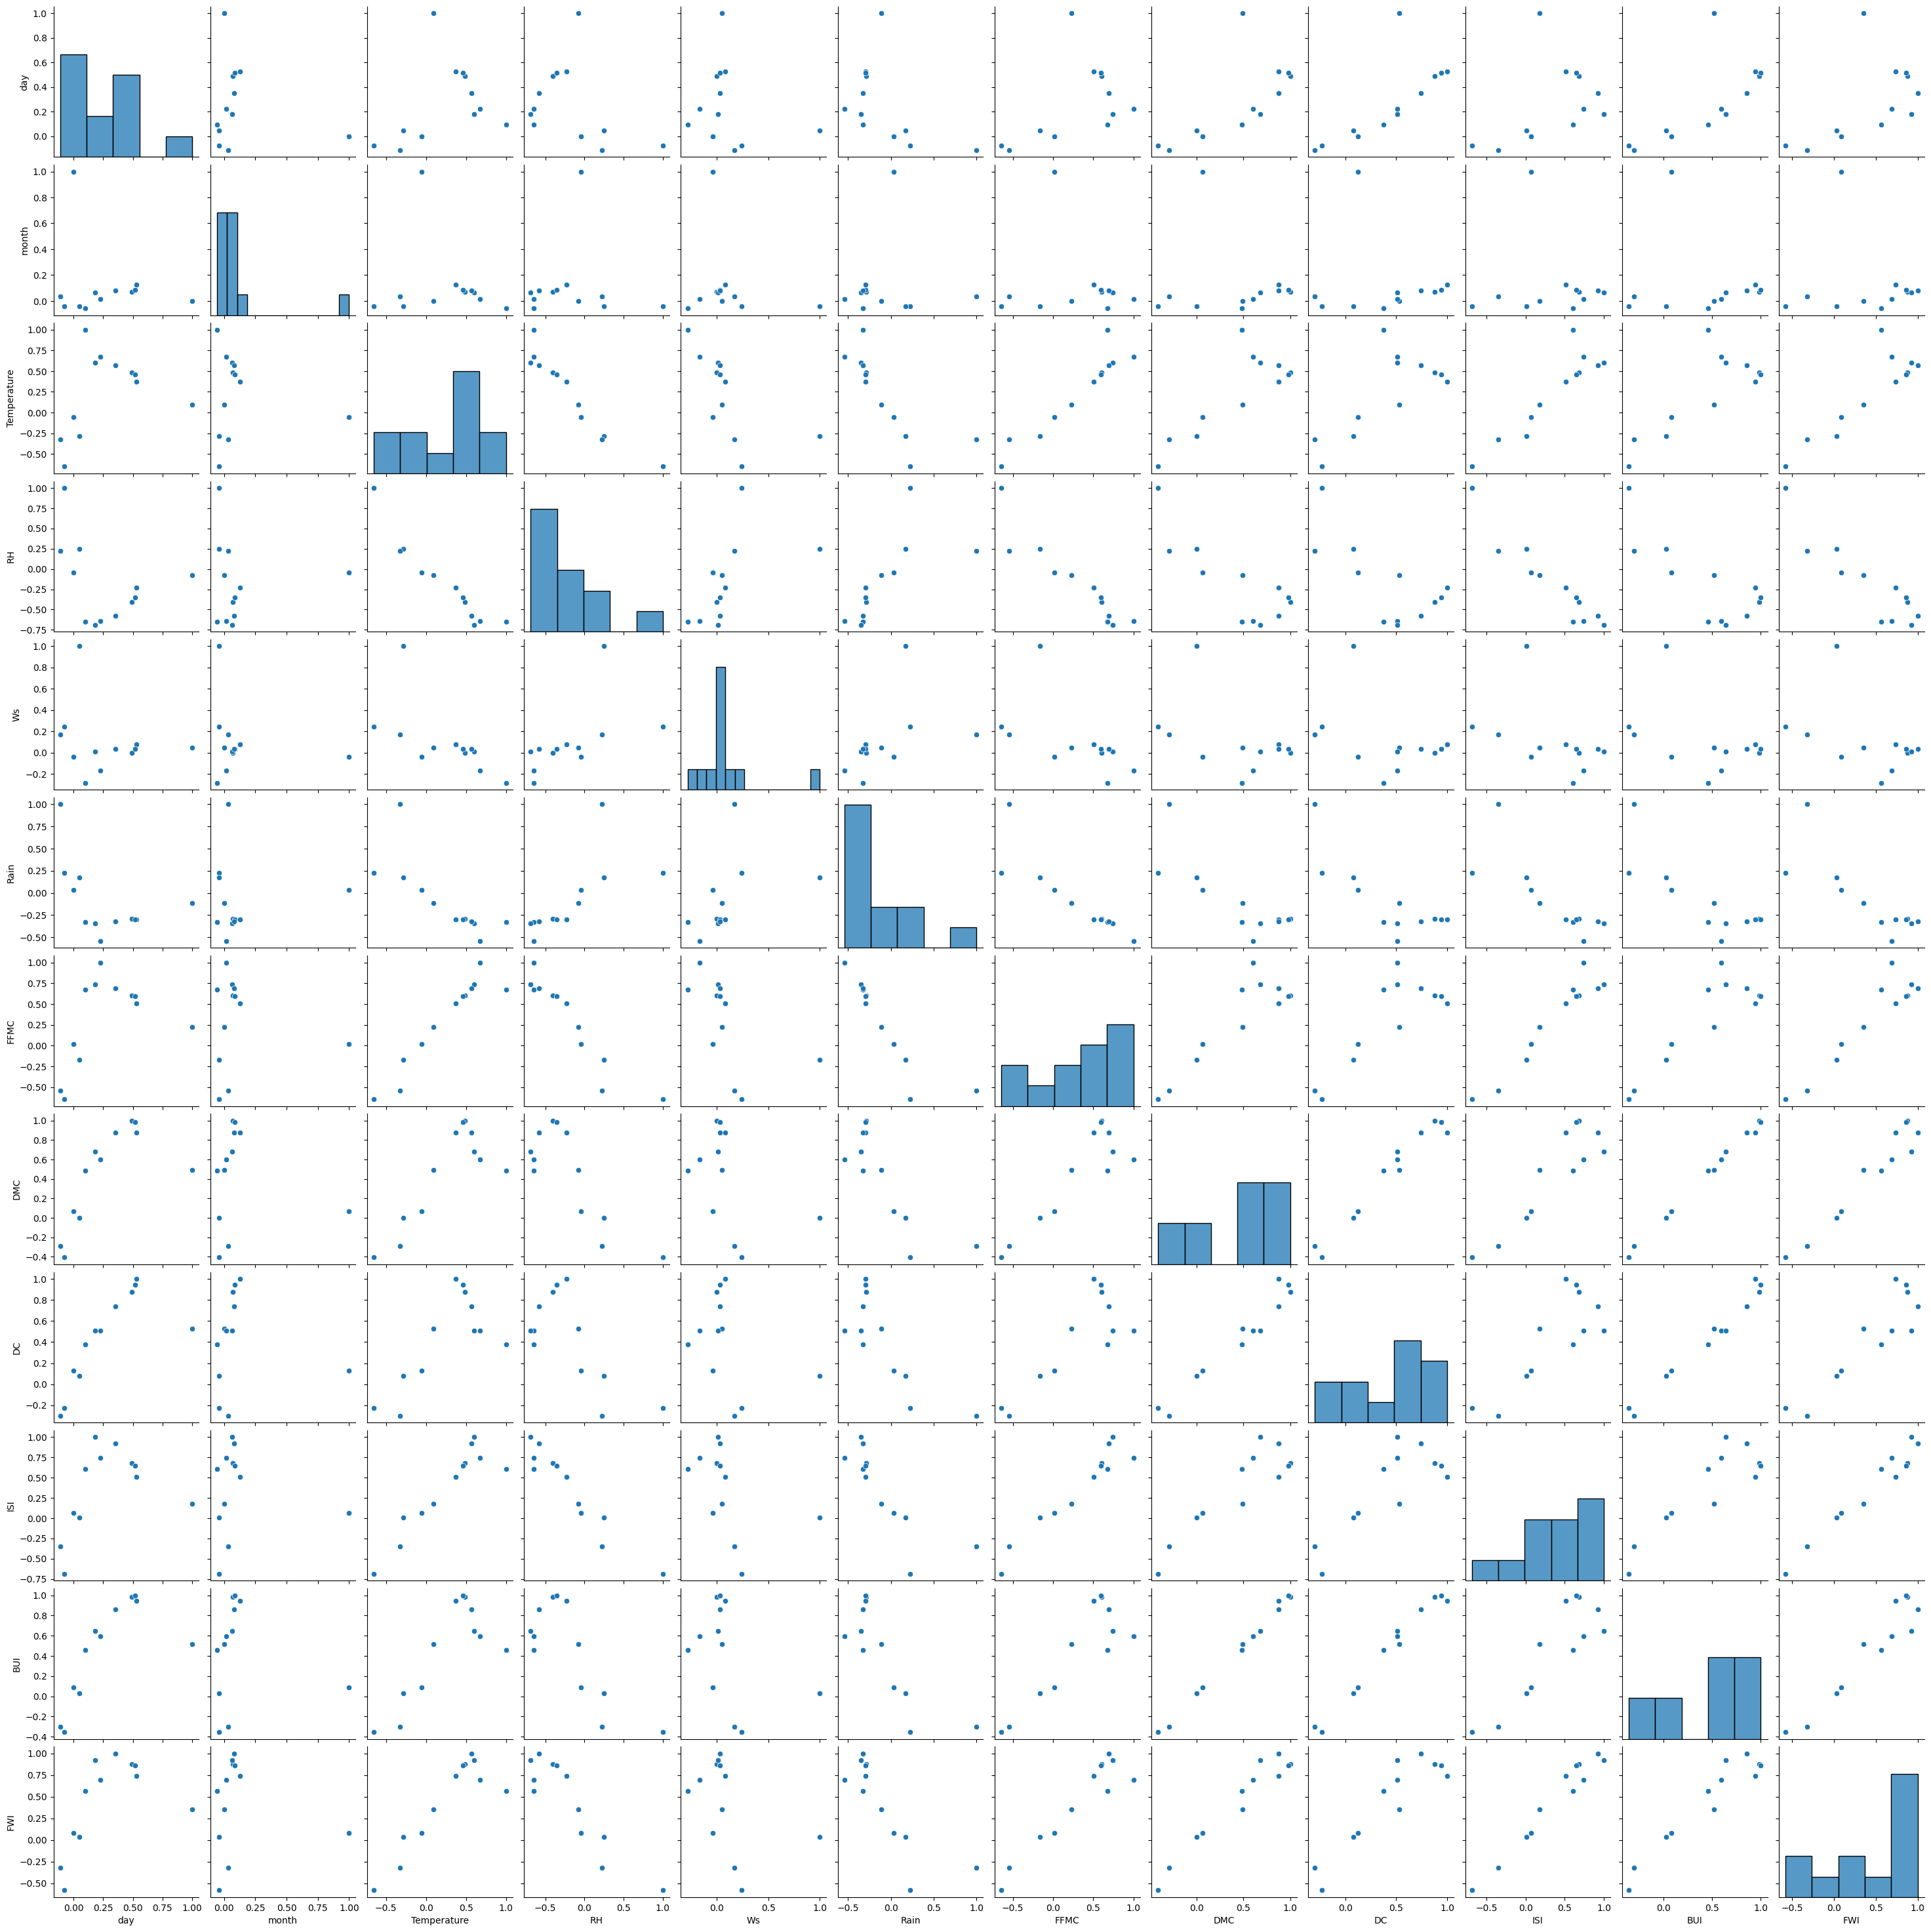

In [32]:
# Multivariate analysis
sns.pairplot(dataset.corr())

<Axes: >

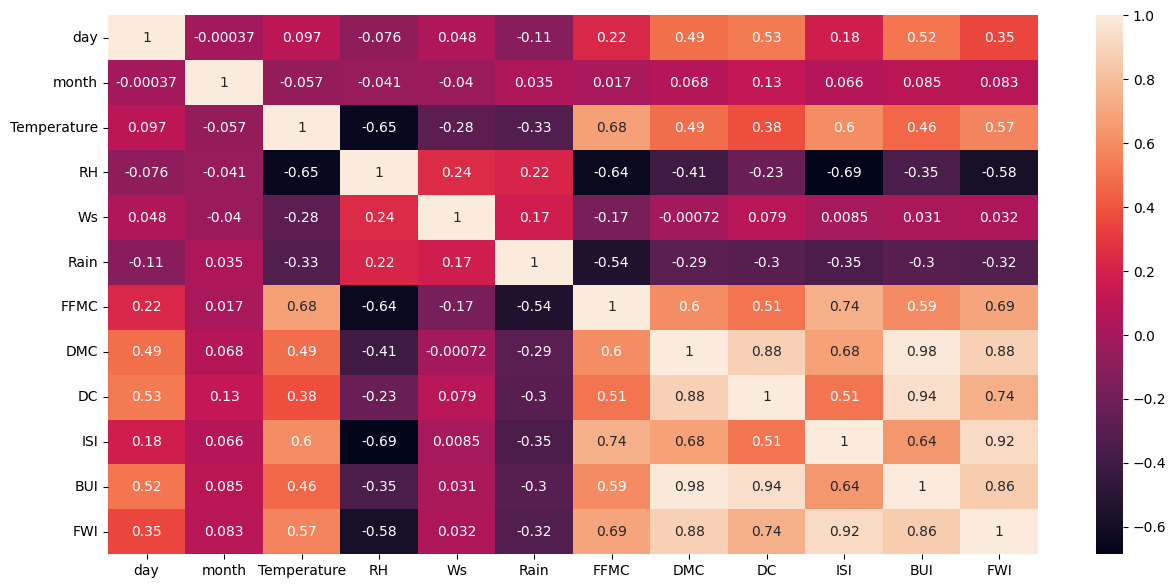

In [33]:
# Heatmap
plt.figure(figsize=(15,7))
sns.heatmap(dataset.corr(),annot=True)

### Univariate analysis

In [34]:
dataset.columns

Index(['day', 'month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC',
       'ISI', 'BUI', 'FWI'],
      dtype='object')

In [35]:
numerical_col = [col for col in dataset.columns if dataset[col].dtype != 'O']
numerical_col

['day',
 'month',
 'Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI']

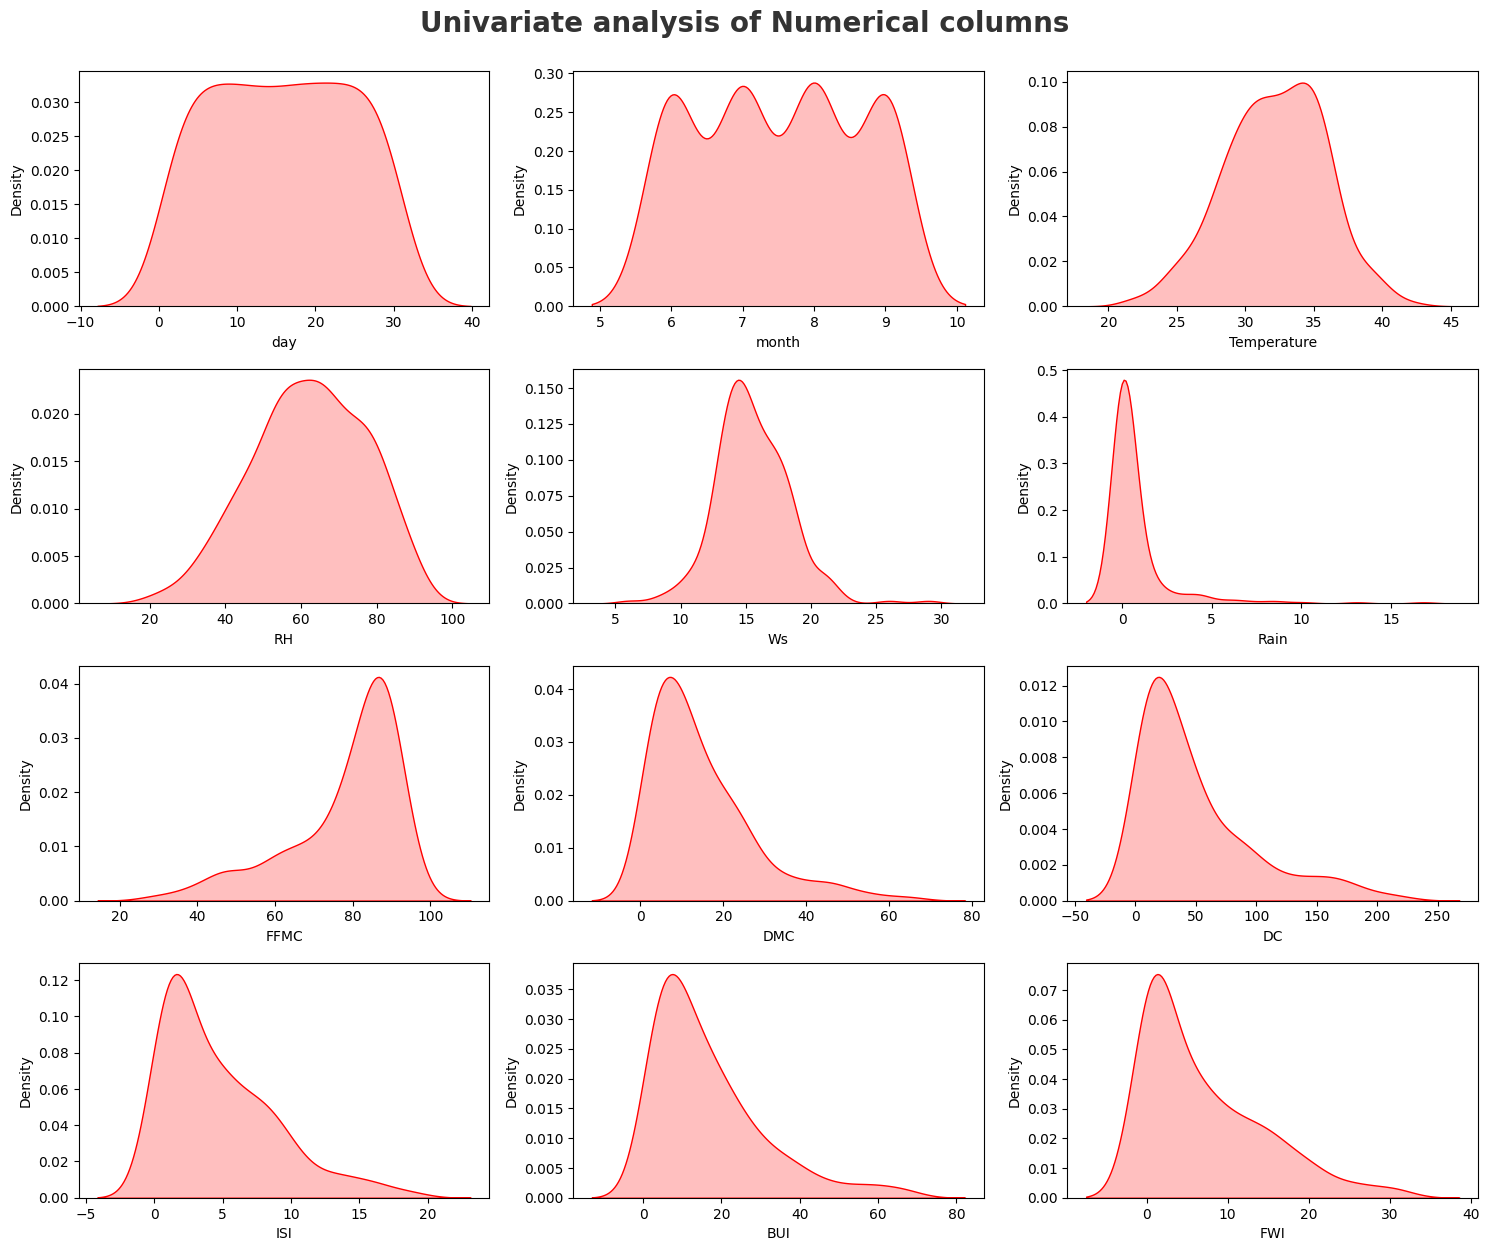

In [36]:
plt.figure(figsize=(15,15))
plt.suptitle('Univariate analysis of Numerical columns',fontsize=20,fontweight='bold',alpha=0.8,y=1)
for i in range(0,len(numerical_col)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x = dataset[numerical_col[i]],shade=True,color='r')
    plt.xlabel(numerical_col[i])
    plt.tight_layout()

## Observations
Temperature : temperature noon (temperature max) in Celsius degrees: 22 to 42

RH : Relative Humidity in %: 21 to 90

Ws :Wind speed in km/h: 6 to 29

Rain: total day in mm: 0 to 16.8

(FFMC) Fine Fuel Moisture Code index from the FWI system: 28.6 to 92.5

(DMC) Duff Moisture Code index from the FWI system: 1.1 to 65.9

(DC) Drought Code index from the FWI system: 7 to 220.4

(ISI) Initial Spread Index from the FWI system: 0 to 18.5

(BUI) Buildup Index from the FWI system: 1.1 to 68

(FWI) Fire Weather Index: 0 to 31.1

We can see outliers in most of the cases

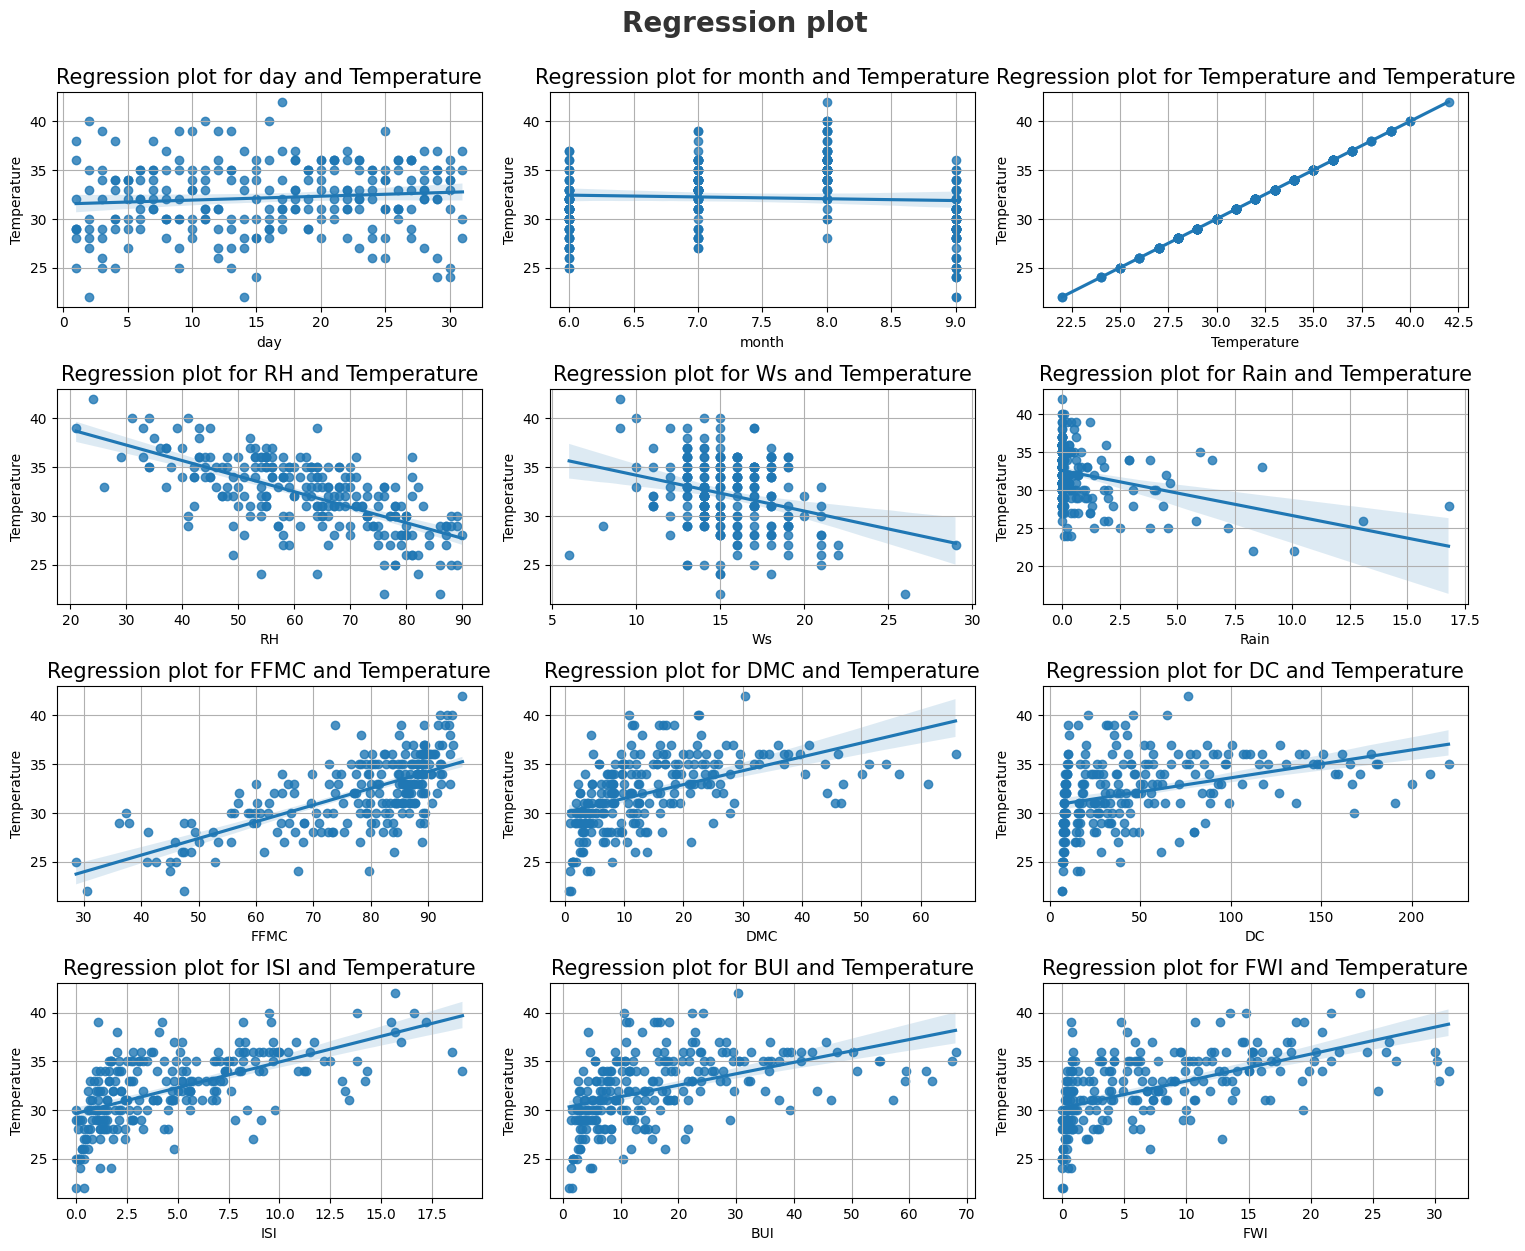

In [37]:
plt.figure(figsize=(15,15))
plt.suptitle('Regression plot',fontsize=20,fontweight='bold',alpha=0.8,y=1)
for i in range(0,len(numerical_col)):
    plt.subplot(5,3,i+1)
    sns.regplot(x=dataset[numerical_col[i]],y='Temperature',data=dataset)
    plt.title(f"Regression plot for {numerical_col[i]} and Temperature",fontsize=15)
    plt.xlabel(numerical_col[i])
    plt.ylabel('Temperature')
    plt.grid()
    #plt.show()
    plt.tight_layout()


array([[<Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'Temperature'}>],
       [<Axes: title={'center': 'RH'}>, <Axes: title={'center': 'Ws'}>,
        <Axes: title={'center': 'Rain'}>],
       [<Axes: title={'center': 'FFMC'}>,
        <Axes: title={'center': 'DMC'}>, <Axes: title={'center': 'DC'}>],
       [<Axes: title={'center': 'ISI'}>, <Axes: title={'center': 'BUI'}>,
        <Axes: title={'center': 'FWI'}>]], dtype=object)

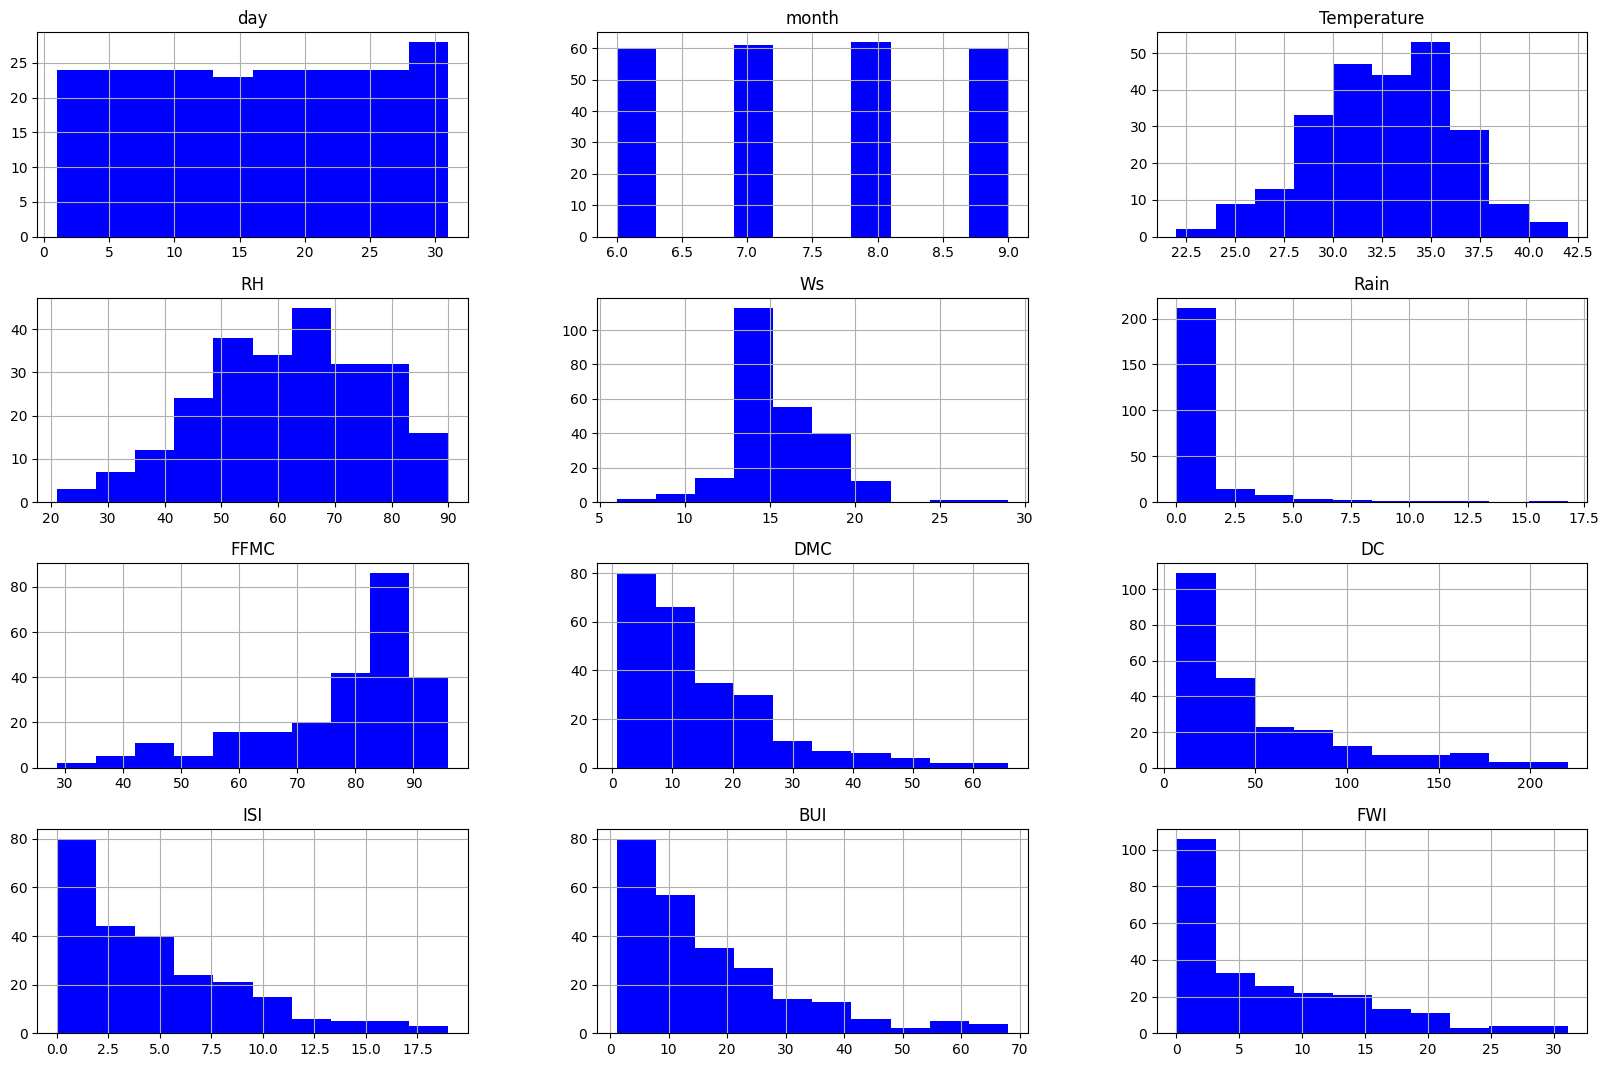

In [38]:
## Histogram
dataset.hist(figsize=(20,13),color='b')

<Axes: xlabel='day', ylabel='Temperature'>

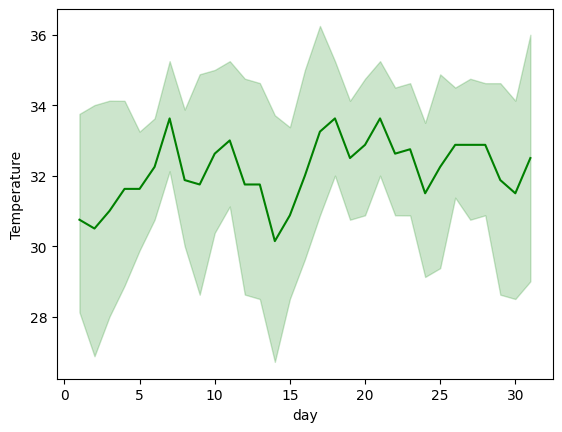

In [39]:
# Lineplot

sns.lineplot(x='day',y='Temperature',data=dataset,color='g')

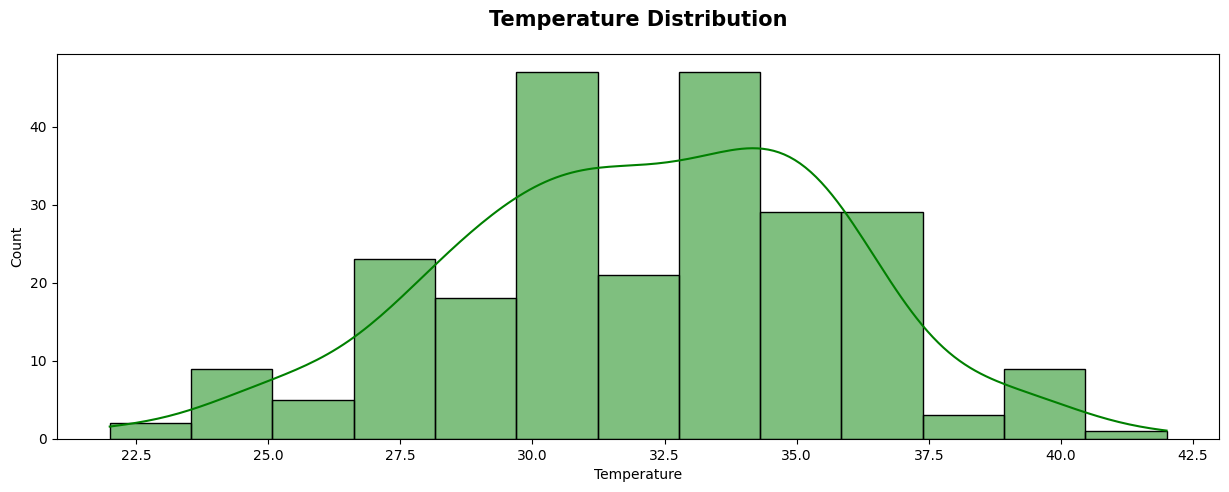

In [40]:
# Visualization of Target feature
plt.figure(figsize=(15,5))
sns.histplot(x=dataset['Temperature'],color='g',kde=True)
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Temperature Distribution',fontsize=15,weight='bold',pad=20)
plt.show()

# Observation:-

Temperature occur most of the time in range 32.5 to 35.0

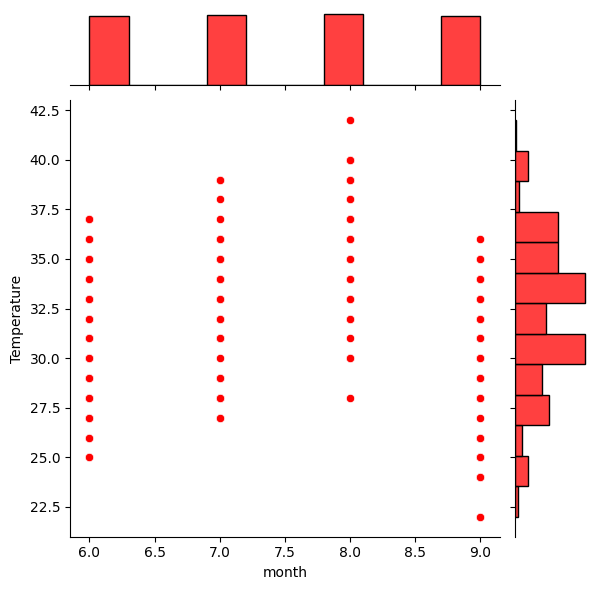

In [41]:
sns.jointplot(x='month',y='Temperature',data=dataset,color='r')

## Outliers

<Axes: ylabel='Temperature'>

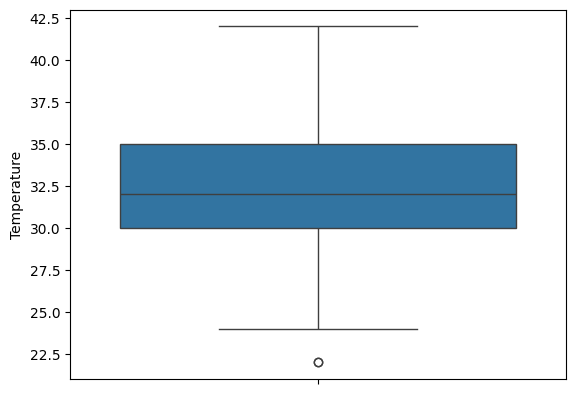

In [42]:
# Checking outliers with repect to target feature
sns.boxplot(dataset['Temperature'])

<Axes: xlabel='Temperature', ylabel='Rain'>

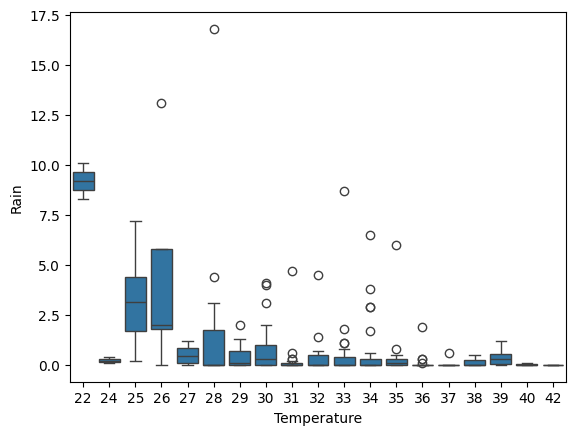

In [43]:
# Boxplot of Rain vs Temperature
sns.boxplot(x = dataset['Temperature'],y=dataset['Rain'],data=dataset)

## Creating Dependent and Independent features

In [44]:
dataset.columns

Index(['day', 'month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC',
       'ISI', 'BUI', 'FWI'],
      dtype='object')

In [45]:
## Independent Features
x = dataset[['day', 'month', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC','ISI', 'BUI', 'FWI']]
## Dependent Features
y = dataset['Temperature']

In [46]:
x

,day,month,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,1,6,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,2,6,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,3,6,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,4,6,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,5,6,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5
...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5
240,27,9,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0
241,28,9,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2
242,29,9,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7


In [47]:
y

0      29
1      29
2      26
3      25
4      27
       ..
239    30
240    28
241    27
242    24
243    24
Name: Temperature, Length: 243, dtype: int32

## Train Test Split

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=10)

In [49]:
print(f'x train shape: {x_train.shape}')
print(f'x test shape: {x_test.shape}')
print(f'y train shape: {y_train.shape}')
print(f'y test shape: {y_test.shape}')

x train shape: (162, 11)
x test shape: (81, 11)
y train shape: (162,)
y test shape: (81,)


In [50]:
len([x_train,x_test,y_train,y_test])

4

In [51]:
x_train

,day,month,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
25,26,6,64,18,0.0,86.8,17.8,71.8,6.7,21.6,10.6
121,30,9,78,14,1.4,45.0,1.9,7.5,0.2,2.4,0.1
174,23,7,71,17,0.0,87.3,46.6,99.0,6.9,46.5,16.3
72,12,8,51,13,0.3,81.3,15.6,75.1,2.5,20.7,4.2
186,4,8,35,15,0.0,93.8,23.0,42.7,15.7,22.9,20.9
...,...,...,...,...,...,...,...,...,...,...,...
64,4,8,69,13,0.0,85.0,8.2,19.8,4.0,8.2,3.9
15,16,6,89,13,0.7,36.1,1.7,7.6,0.0,2.2,0.0
229,16,9,26,13,0.0,93.9,21.2,59.2,14.2,22.4,19.3
125,4,6,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0


In [52]:
x_test

,day,month,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
46,17,7,70,14,0.0,82.8,9.4,34.1,3.2,11.1,3.6
226,13,9,49,19,0.0,88.6,11.5,33.4,9.1,12.4,10.3
181,30,7,56,16,0.0,88.9,23.8,57.1,8.2,23.8,13.2
116,25,9,81,21,5.8,48.6,3.0,7.7,0.4,3.0,0.1
124,3,6,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1
...,...,...,...,...,...,...,...,...,...,...,...
127,6,6,54,11,0.1,83.7,8.4,26.3,3.1,9.3,3.1
242,29,9,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7
208,26,8,37,16,0.0,92.2,61.3,167.2,13.1,64.0,30.3
102,11,9,77,21,1.8,58.5,1.9,8.4,1.1,2.4,0.3


In [53]:
y_train

25     31
121    25
174    31
72     35
186    38
       ..
64     34
15     29
229    33
125    30
9      28
Name: Temperature, Length: 162, dtype: int32

In [54]:
y_test

46     29
226    29
181    36
116    26
124    29
       ..
127    35
242    24
208    33
102    30
78     36
Name: Temperature, Length: 81, dtype: int32

## Standardizing or Feature Scaling

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # Intializing

In [56]:
scaler

StandardScaler()

In [57]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [58]:
x_train

array([[ 1.30705791, -1.39305207,  0.06835876, ...,  0.48086219,
         0.38986031,  0.52024214],
       [ 1.77217242,  1.29354835,  0.99672801, ..., -1.07139989,
        -1.0010797 , -0.93452011],
       [ 0.95822202, -0.4975186 ,  0.53254338, ...,  0.5286241 ,
         2.19373563,  1.30997022],
       ...,
       [ 0.14427163,  1.29354835, -2.45150064, ...,  2.27193383,
         0.44781614,  1.72561657],
       [-1.2510719 , -1.39305207,  0.06835876, ..., -0.59378078,
        -0.76925637, -0.8098262 ],
       [-0.55340014, -1.39305207,  1.0630401 , ..., -0.80870938,
        -0.26214282, -0.82368108]])

In [59]:
x_test

array([[ 2.60550258e-01, -4.97518595e-01,  4.66231295e-01,
        -5.81850675e-01, -4.24064583e-01,  3.74594357e-01,
        -4.06694465e-01, -3.03195163e-01, -3.54971234e-01,
        -3.70810009e-01, -4.49599362e-01],
       [-2.04564252e-01,  1.29354835e+00, -9.26322582e-01,
         1.26638088e+00, -4.24064583e-01,  7.58044470e-01,
        -2.28559462e-01, -3.17928133e-01,  1.05400512e+00,
        -2.76631780e-01,  4.78677502e-01],
       [ 1.77217242e+00, -4.97518595e-01, -4.62137956e-01,
         1.57441947e-01, -4.24064583e-01,  7.77878096e-01,
         8.14802699e-01,  1.80888129e-01,  8.39076521e-01,
         5.49238849e-01,  8.80468981e-01],
       [ 1.19077928e+00,  1.29354835e+00,  1.19566428e+00,
         2.00567350e+00,  3.00789995e+00, -1.88643906e+00,
        -9.49582093e-01, -8.58838594e-01, -1.02363798e+00,
        -9.57612824e-01, -9.34520112e-01],
       [-1.36735053e+00, -1.39305207e+00,  1.12935219e+00,
        -5.81850675e-01,  7.59371462e-01, -1.87982786e+00,
  

## Linear Regression Model Training

In [60]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [61]:
regression

LinearRegression()

In [62]:
regression.fit(x_train,y_train)

LinearRegression()

In [63]:
## Printing the coefficient
regression.coef_

array([-0.35976061, -0.2079494 , -1.48610283, -0.72513797, -0.21447574,
        0.98443856,  0.48990386,  0.55907497,  0.15640878, -0.13515428,
       -0.32764622])

In [64]:
## Printing the intercept
regression.intercept_

32.074074074074076

In [65]:
## Prediction for Test data
reg_predict = regression.predict(x_test)
reg_predict

array([32.04572357, 32.92987407, 33.23814672, 24.9733634 , 28.88173569,
       33.59971493, 31.94965038, 34.62252392, 31.53652463, 32.76500165,
       33.55662832, 33.4961886 , 35.59682697, 31.98514881, 33.50594348,
       33.43355473, 26.66644882, 36.03746021, 33.34590857, 24.06010277,
       32.16101853, 32.53678767, 33.072265  , 32.83621735, 30.11845952,
       32.55512949, 33.38292998, 32.0688871 , 32.38195624, 34.0147771 ,
       34.78299348, 33.57026301, 34.25792739, 32.82828543, 31.17308483,
       28.823611  , 32.59288165, 31.57473613, 33.09732933, 34.40016709,
       33.79545074, 35.45382708, 34.48495762, 37.08570769, 33.05292106,
       36.74434443, 32.24402202, 35.45411108, 30.44679186, 31.06843192,
       32.50129793, 39.31010836, 32.77144256, 34.88584646, 27.26666955,
       36.98494517, 33.72295719, 33.59854576, 28.81624864, 32.40512337,
       32.51829822, 32.25339882, 25.03306542, 36.36721094, 36.26006008,
       29.25862729, 29.50071761, 29.19179616, 36.00248177, 28.63

## Assumptions of Linear regression

Text(0, 0.5, 'Test Predicted data')

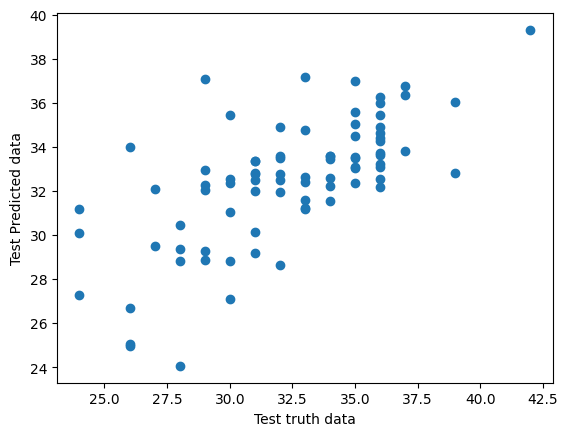

In [66]:
plt.scatter(y_test,reg_predict)
plt.xlabel('Test truth data')
plt.ylabel('Test Predicted data')

In [67]:
## Residual
residual = y_test - reg_predict

<Axes: xlabel='Temperature', ylabel='Density'>

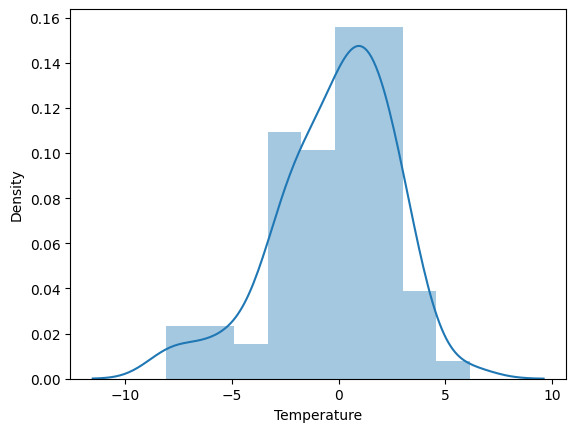

In [68]:
sns.distplot(residual,kde=True) # DIstribution of residuals

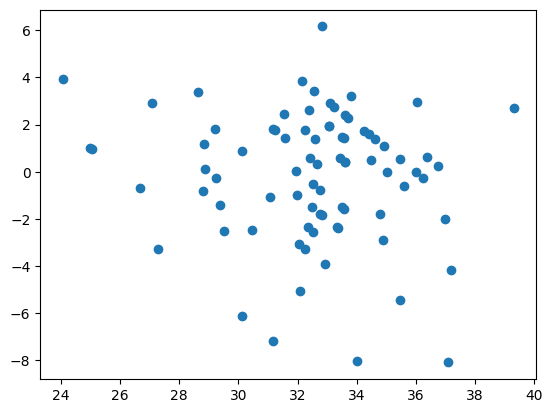

In [69]:
## Scatter plot with predictions and residuals
## Uniform distribution
plt.scatter(reg_predict,residual)

## Performance matrics

In [70]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(f'Mean squared Error: {mean_squared_error(y_test,reg_predict)}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test,reg_predict)}')
print(f'Root Mean squared Error: {np.sqrt(mean_squared_error(y_test,reg_predict))}')

Mean squared Error: 7.623212057698475
Mean Absolute Error: 2.139576518309345
Root Mean squared Error: 2.7610164899359937


## R-Squared and adjusted R square

In [71]:
from sklearn.metrics import r2_score
score = r2_score(y_test,reg_predict)
print(score)

0.4493097164784672


In [72]:
## Adjusted R Square
#display adjusted R square
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.36151851185909234

# Ridge Regression Algorithm

In [73]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(x_train,y_train)

Ridge()

In [74]:
# Print the coeffcient
print(ridge.coef_)

[-0.35414025 -0.20483015 -1.47419702 -0.72535001 -0.21731847  0.97923153
  0.35326365  0.4745688   0.13544884  0.05478063 -0.28129306]


In [75]:
# Print the Intercept
print(ridge.intercept_)

32.074074074074076


In [76]:
# Prediction for test data
ridge_predict = ridge.predict(x_test)
ridge_predict

array([32.04792803, 32.92437205, 33.23909882, 24.99775465, 28.89393287,
       33.59873917, 31.93691186, 34.62488992, 31.54652792, 32.76462823,
       33.5519589 , 33.48948957, 35.57275979, 31.99933098, 33.45507821,
       33.44550297, 26.70185766, 36.02626213, 33.33851779, 24.0703515 ,
       32.12683414, 32.53017701, 33.0917077 , 32.84211183, 30.10996981,
       32.56102021, 33.37942771, 32.05501754, 32.37212909, 34.00039369,
       34.76641485, 33.55938479, 34.2414206 , 32.83569023, 31.18045264,
       28.83036278, 32.57521966, 31.5740312 , 33.10265835, 34.37277781,
       33.79585294, 35.44143906, 34.48524832, 37.06014009, 33.05437395,
       36.74205474, 32.23032166, 35.46170301, 30.44189572, 31.0746311 ,
       32.50544055, 39.29116535, 32.76127802, 34.88388049, 27.29953737,
       36.98554154, 33.72854819, 33.58583697, 28.83128188, 32.40103619,
       32.53372568, 32.24008145, 25.02688218, 36.37829274, 36.239963  ,
       29.27972425, 29.48503883, 29.18905257, 36.00808068, 28.63

Text(0, 0.5, 'Test Predicted Data')

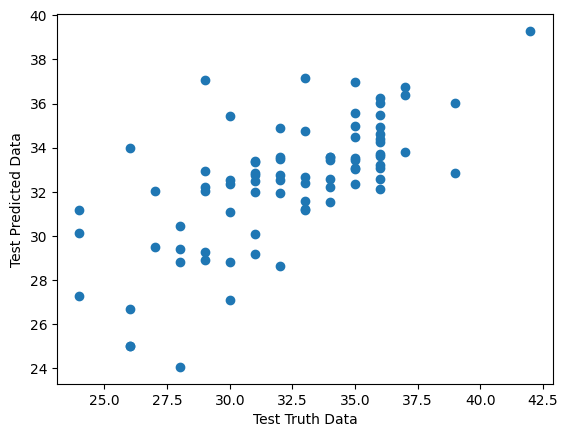

In [77]:
## Assumptions of Ridge regresssion
plt.scatter(y_test,ridge_predict)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [78]:
## Residuals 
residuals =y_test-ridge_predict
residuals

46    -3.047928
226   -3.924372
181    2.760901
116    1.002245
124    0.106067
         ...   
127    0.000550
242   -7.164072
208   -4.166442
102    2.892934
78     2.384867
Name: Temperature, Length: 81, dtype: float64

<Axes: xlabel='Temperature', ylabel='Density'>

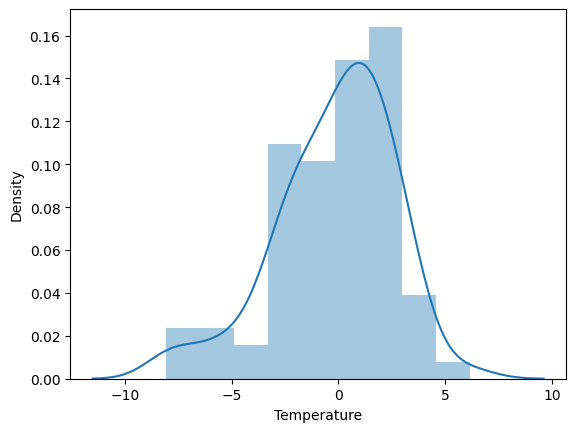

In [79]:
sns.distplot(residuals,kde=True) # Distribution of residuals

In [80]:
## Performance Metrics

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test, ridge_predict))
print(mean_absolute_error(y_test, ridge_predict))
print(np.sqrt(mean_squared_error(y_test, ridge_predict)))

7.616302656274304
2.1397222803107128
2.759764963955138


## R square and adjusted R square

In [81]:
# R square
from sklearn.metrics import r2_score
score = r2_score(y_test, ridge_predict)
print(score)

0.4498088420702048


In [82]:
## Adjusted R Square
#display adjusted R square
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.3620972081973388

# Lasso Regression Model 

In [83]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso
lasso.fit(x_train,y_train)

Lasso()

In [84]:
## print the coefficients
print(lasso.coef_)

[ 0.         -0.         -0.88423537 -0.         -0.          0.88313134
  0.          0.          0.          0.          0.        ]


In [85]:
## print the intercept
print(lasso.intercept_)

32.074074074074076


In [86]:
## prediction for the test data
lasso_pred = lasso.predict(x_test)
lasso_pred

array([31.99263189, 33.56261409, 33.16968133, 29.35085197, 29.41532603,
       33.00570181, 32.24618859, 33.57987995, 32.17946599, 33.03180429,
       32.43352237, 32.64830012, 34.42463082, 31.61671515, 32.83763259,
       33.35142638, 29.33942467, 34.79854886, 32.38506498, 29.63719153,
       32.36854863, 32.21265622, 32.60134175, 31.81897394, 31.16330572,
       32.75364414, 32.88409128, 32.36320974, 32.04108928, 31.96868565,
       33.24608236, 33.07067555, 33.54659742, 32.57214892, 31.41161583,
       30.06340682, 32.79726231, 32.13550568, 33.36310351, 33.22497663,
       33.25167109, 34.07840658, 33.22831682, 33.75728546, 32.90619636,
       34.59903828, 32.34644356, 33.72050521, 31.73648451, 31.41845375,
       32.26170559, 35.46055533, 32.15686124, 33.60932262, 29.07618954,
       34.41195434, 33.23999395, 32.50358516, 29.88575148, 32.20406944,
       32.0385909 , 31.44605525, 29.20463799, 34.49394409, 33.4095622 ,
       30.24824223, 31.37474327, 30.84852284, 34.06622977, 30.49

Text(0, 0.5, 'Test Predicted Data')

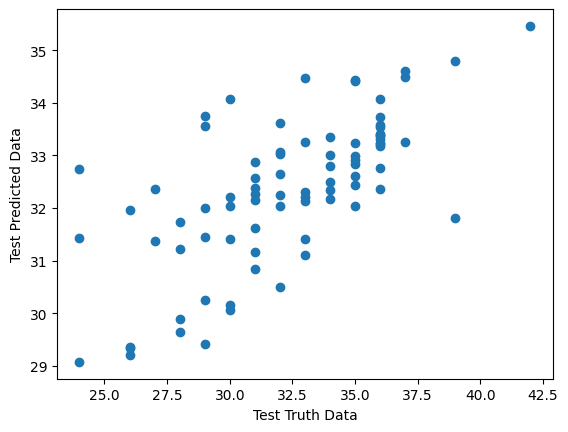

In [87]:
## Assumptions of Lasso Regression

plt.scatter(y_test, lasso_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [88]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test, lasso_pred))
print(mean_absolute_error(y_test, lasso_pred))
print(np.sqrt(mean_squared_error(y_test, lasso_pred)))

8.69462464944341
2.370968686727018
2.9486648927003234


### Rsquare and adjusted R square

In [89]:
# R square
from sklearn.metrics import r2_score
score = r2_score(y_test, lasso_pred)
print(score)

0.3719123543887275


In [90]:
## Adjusted R Square
#display adjusted R square
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.2717824398709884

# Elastic Net Regression Model 

In [91]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()
elastic
elastic.fit(x_train, y_train)

ElasticNet()

In [92]:
## print the coefficients
print(elastic.coef_)

[-0.         -0.         -0.77155493 -0.27327033 -0.02945645  0.70980198
  0.11177449  0.          0.20914599  0.04593431  0.12829249]


In [93]:
## print the intercept
print(elastic.intercept_)

32.074074074074076


In [94]:
## prediction for the test data
elastic_pred = elastic.predict(x_test)
elastic_pred

array([31.9573208 , 33.23686908, 33.35699564, 28.69175409, 29.50702659,
       33.21952486, 31.75246849, 33.96237735, 32.10800305, 32.71913539,
       32.6464949 , 32.70818669, 34.28160866, 31.98757886, 32.58127398,
       33.38088877, 29.25544946, 35.1329971 , 32.41345187, 28.81942678,
       31.92062398, 32.01321369, 32.87611371, 32.19248582, 30.76147509,
       32.77885483, 32.9241576 , 31.80574265, 31.84088675, 32.63570681,
       33.35824365, 32.97725238, 33.16526411, 32.6259555 , 31.48228091,
       29.90876877, 32.28704956, 31.73349961, 33.28556103, 32.87586141,
       33.61368581, 34.06687234, 33.48616338, 34.31378768, 32.80354959,
       35.56194932, 31.98083723, 34.20080511, 31.06352775, 31.3703163 ,
       32.33015611, 36.68465163, 32.02910227, 33.90164802, 29.13016242,
       35.33664404, 33.44975962, 32.59500157, 29.89482886, 32.07728159,
       32.39209933, 31.39172713, 28.33121558, 35.11153428, 34.62534381,
       30.33956758, 30.58992082, 30.41863187, 34.79501455, 29.86

Text(0, 0.5, 'Test Predicted Data')

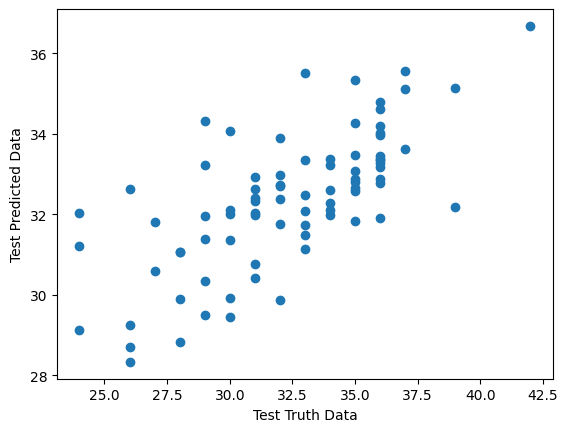

In [95]:
## Assumption of ElasticNet Regression

plt.scatter(y_test, elastic_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [96]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test, elastic_pred))
print(mean_absolute_error(y_test, elastic_pred))
print(np.sqrt(mean_squared_error(y_test, elastic_pred)))

7.918267418307841
2.2796482511865195
2.8139416160090884


In [97]:
# R square
from sklearn.metrics import r2_score
score = r2_score(y_test, elastic_pred)
print(score)

0.4279953257782332


In [98]:
## Adjusted R Square
#display adjusted R square
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.3368061748153428